Enter number of lines to draw:  1



Line 1:


Enter starting point (x y):  1 5
Enter ending point (x y):  9 13


Points for Line 1: [(1, 5), (2, 6), (3, 7), (4, 8), (5, 9), (6, 10), (7, 11), (8, 12), (9, 13)]
Step directions: sx=1, sy=1
Slope: 1.00


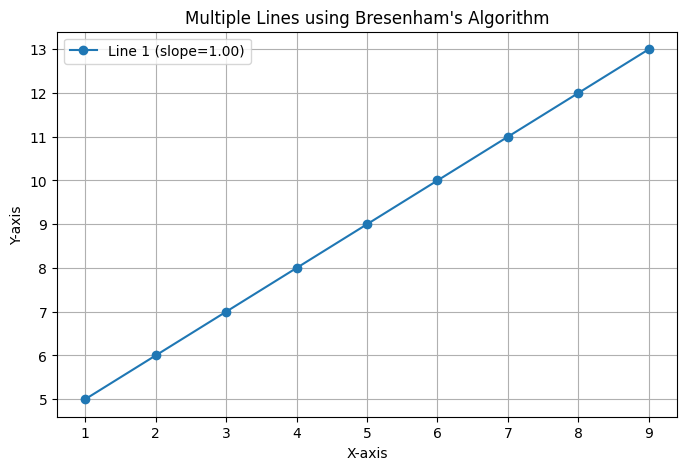

In [1]:
import matplotlib.pyplot as plt

def bresenham_line(xa, ya, xb, yb):
    "Return list of (x, y) points for a line using Bresenham's algorithm."
    points = []

    dx = abs(xb - xa)
    dy = abs(yb - ya)
    x, y = xa, ya

    # Step directions
    sx = 1 if xb > xa else -1 if xb < xa else 0
    sy = 1 if yb > ya else -1 if yb < ya else 0

    if dy <= dx:
        p = 2 * dy - dx
        for _ in range(dx + 1):
            points.append((x, y))
            x += sx
            if p < 0:
                p += 2 * dy
            else:
                y += sy
                p += 2 * (dy - dx)
    else:
        p = 2 * dx - dy
        for _ in range(dy + 1):
            points.append((x, y))
            y += sy
            if p < 0:
                p += 2 * dx
            else:
                x += sx
                p += 2 * (dx - dy)

    return points, sx, sy

def main():
    n = int(input("Enter number of lines to draw: "))

    plt.figure(figsize=(8, 5))
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title("Multiple Lines using Bresenham's Algorithm")
    plt.grid(True)
    #plt.gca().set_aspect('equal')

    for i in range(n):
        print(f"\nLine {i+1}:")
        xa, ya = map(int, input("Enter starting point (x y): ").split())
        xb, yb = map(int, input("Enter ending point (x y): ").split())

        # Compute points and step directions
        points, sx, sy = bresenham_line(xa, ya, xb, yb)
        x_coords, y_coords = zip(*points)

        # Calculate slope
        slope = (yb - ya) / (xb - xa) if xb != xa else float('inf')

        # Draw the line
        plt.plot(x_coords, y_coords, marker='o', label=f'Line {i+1} (slope={slope:.2f})')

        # Print results
        print(f"Points for Line {i+1}: {points}")
        print(f"Step directions: sx={sx}, sy={sy}")
        print(f"Slope: {slope:.2f}")

    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
